In [26]:
# Import necessary libraries
import pandas as pd

# Define a function that takes a file path as input
def read_triplicate_data(filepath):
    # Open the CSV file
    # Assuming the separator is ';' and the first row is the header
    df = pd.read_csv(filepath, sep=';', index_col=0, header=0).T
    return df

# Provide the file path
filepath = '/home/nrz989/Documents/ASMT dynamic analysis/ASMT_data.csv'

# Call the function with the file path
df = read_triplicate_data(filepath)

# Display the DataFrame
print(df)

             Conc NAS  10 uM SAM  30 uM SAM  60 uM SAM  90 uM SAM 140 uM SAM  \
SAM uM            NaN       10.0       30.0       60.0       90.0      140.0   
1 uM NAS            1    1600,68   2524,273    2915,77   2605,212   2556,358   
1 uM NAS.1          1   1583,792    2386,84   2852,517   2927,518   2212,399   
1 uM NAS.2          1   1712,083    2313,79   3010,761    3067,62   2736,876   
5 uM NAS            5   6294,389  11005,759  12971,931  12883,119  14367,527   
5 uM NAS.1          5   6662,287   9735,831   12119,79  12570,151  16005,604   
5 uM NAS.2          5   6052,426  10196,037  12743,879  12526,331  13780,145   
20 uM NAS          20  15708,357  26102,091  30802,189  34247,758  35118,005   
20 uM NAS.1        20   16261,62  26247,904  30518,653  34446,212  35475,704   
20 uM NAS.2        20  16273,223  25578,453  30470,324  34651,294  35342,948   
50 uM NAS          50  20845,564  36325,125  45260,786  50453,996  55369,268   
50 uM NAS.1        50  21790,671  36452,

In [30]:
# Convert DataFrame to numeric, replacing commas with periods
df = df.apply(lambda x: x.str.replace(',', '.')).astype(float)

# Group by NAS concentrations and calculate the average
grouped = df.groupby(df.columns[0])
areas_averaged = grouped.mean()

# Round the values to one decimal place
areas_averaged = areas_averaged.round(1)

# Display the averaged DataFrame
print(areas_averaged)

          10 uM SAM  30 uM SAM  60 uM SAM  90 uM SAM  140 uM SAM  200 uM SAM
Conc NAS                                                                    
1.0          1632.2     2408.3     2926.3     2866.8      2501.9      2660.0
5.0          6336.4    10312.5    12611.9    12659.9     14717.8     12407.1
20.0        16081.1    25976.1    30597.1    34448.4     35312.2     35378.9
50.0        21574.8    36333.5    45456.8    50241.0     55263.8     54603.2
100.0       23713.3    39394.2    46317.8    51730.2     53717.2     54644.9
300.0       23372.5    33533.5    37460.2    37532.7     37070.3     34870.9


In [31]:
#Calculate standard deviations
esds = grouped.std()
esds.round(1)

,10 uM SAM,30 uM SAM,60 uM SAM,90 uM SAM,140 uM SAM,200 uM SAM
Conc NAS,,,,,,
1.0,69.7,106.9,79.7,237.1,266.4,227.1
5.0,307.1,642.9,441.1,194.6,1153.3,1481.1
20.0,322.8,352.0,179.3,201.8,180.8,262.9
50.0,648.8,114.8,343.5,187.5,97.8,77.1
100.0,242.8,216.7,244.3,163.2,256.4,217.6
300.0,204.1,178.5,270.6,308.7,138.2,187.6


In [32]:
# conversion between area and nM/min: Divide area by 22 from standard curve and assay time 15 min
# convert to uM by dividing by 1000 also correct for dilution to stop reaction volume increase from 25 uL to 83 uL

velocities = areas_averaged/22/15/1000/25*83
velocities.round(4)

,10 uM SAM,30 uM SAM,60 uM SAM,90 uM SAM,140 uM SAM,200 uM SAM
Conc NAS,,,,,,
1.0,0.0164,0.0242,0.0294,0.0288,0.0252,0.0268
5.0,0.0637,0.1038,0.1269,0.1274,0.1481,0.1248
20.0,0.1618,0.2613,0.3078,0.3466,0.3553,0.3559
50.0,0.2171,0.3655,0.4573,0.5055,0.5560,0.5493
100.0,0.2386,0.3963,0.4660,0.5204,0.5404,0.5498
300.0,0.2351,0.3374,0.3769,0.3776,0.3729,0.3508


In [33]:
# calculate velocity esds
velocities_esds = esds/22/15/1000/25*83
velocities_esds.round(4)

,10 uM SAM,30 uM SAM,60 uM SAM,90 uM SAM,140 uM SAM,200 uM SAM
Conc NAS,,,,,,
1.0,0.0007,0.0011,0.0008,0.0024,0.0027,0.0023
5.0,0.0031,0.0065,0.0044,0.0020,0.0116,0.0149
20.0,0.0032,0.0035,0.0018,0.0020,0.0018,0.0026
50.0,0.0065,0.0012,0.0035,0.0019,0.0010,0.0008
100.0,0.0024,0.0022,0.0025,0.0016,0.0026,0.0022
300.0,0.0021,0.0018,0.0027,0.0031,0.0014,0.0019


In [34]:
# change velocities dataframe column names to have SAM conc's only as float

import numpy as np

c_NAS = np.array([20.,50.,100.,300.,600.,900.])
c_SAM = np.array([10., 30., 60., 90., 140., 200.])

V = velocities.copy()
V_esds = velocities_esds.copy()
# column headings changed to concentrations as float values
V.columns = c_SAM
V_esds.columns = c_SAM

V.columns

Index([10.0, 30.0, 60.0, 90.0, 140.0, 200.0], dtype='float64')

In [35]:
# take out subset of data from V and V_esds, default use all


V.drop(V.tail(0).index,inplace = True)
V_esds.drop(V.tail(0).index,inplace = True)

x_SAM = V.columns
y_NAS = V.index

X,Y = np.meshgrid(x_SAM,y_NAS)

Z = V.values

xdata = np.column_stack((X.flatten(), Y.flatten()))
zdata = V.values.flatten()
V

,10.0,30.0,60.0,90.0,140.0,200.0
Conc NAS,,,,,,
1.0,0.016421,0.024229,0.029440,0.028842,0.025171,0.026761
5.0,0.063748,0.103750,0.126883,0.127366,0.148070,0.124823
20.0,0.161786,0.261335,0.307825,0.346572,0.355262,0.355933
50.0,0.217056,0.365537,0.457323,0.505455,0.555987,0.549341
100.0,0.238570,0.396330,0.465985,0.520437,0.540428,0.549761
300.0,0.235142,0.337367,0.376872,0.377602,0.372950,0.350822


SAM concentration on X-axis, NAS on Y. SAM as A in BiBi models NAS is B!! SAM vil then be first substrate in ordered sequential BiBi reactions, NAS second

Define standard Michaelis Menten function

In [39]:
def michaelis_menten(substrate, v_max, k_m):
  """
  This function defines the Michaelis-Menten equation.

  Args:
      substrate: The concentration of the substrate.
      v_max: The maximum reaction velocity.
      k_m: The Michaelis constant.

  Returns:
      The reaction velocity.
  """
  return (v_max * substrate) / (k_m + substrate)

1.0  uM NAS Vmax, KMapp :  [0.02916094 6.59373169]
5.0  uM NAS Vmax, KMapp :  [ 0.14687197 12.22439231]
20.0  uM NAS Vmax, KMapp :  [ 0.38824798 14.1878719 ]
50.0  uM NAS Vmax, KMapp :  [ 0.61329915 19.34387328]
100.0  uM NAS Vmax, KMapp :  [ 0.59588377 15.12472432]
300.0  uM NAS Vmax, KMapp :  [0.39054902 5.80284447]


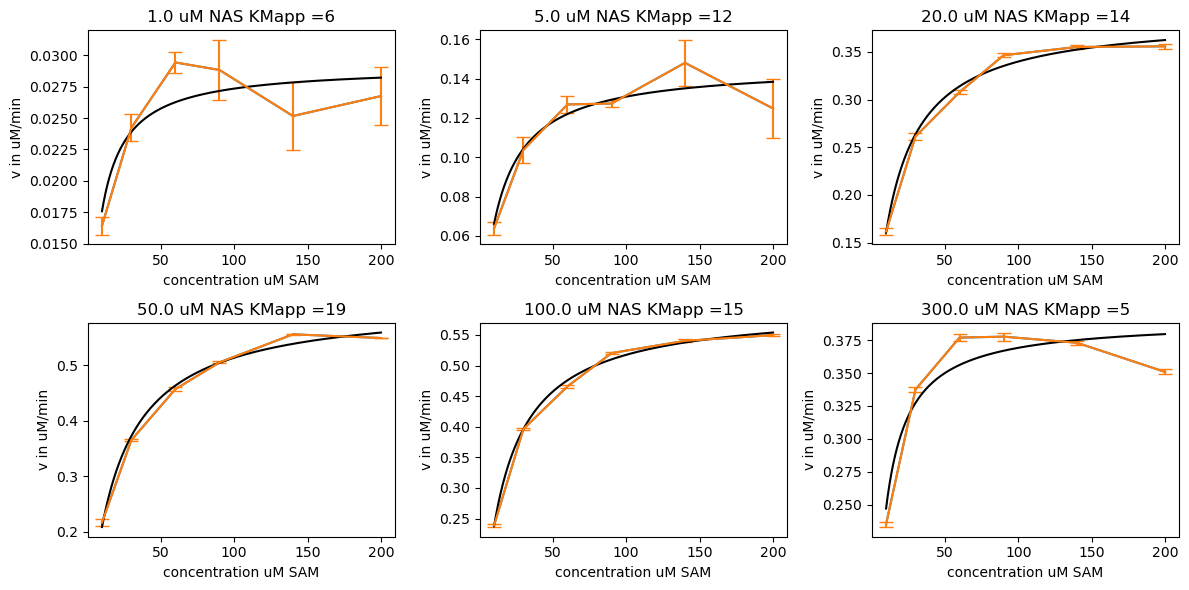

In [40]:
# Plot for fixed NAS conc and fit MM equation - subplot edition

import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

#more x values for curve plotting
x_SAM_fit = np.arange(10,200,.1)


# Define the number of rows and columns for subplots (assuming equal columns)
# Use transposed matrix for fixed NAS
n_rows = int(np.ceil(len(V.T.columns) / 3))  # adjust 3 for desired columns per row
n_cols = 3  # adjust for desired columns per row

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))  # adjust figsize as needed

# Loop through each column and plot in a subplot
for i, col in enumerate(V.T.columns):

    row = i // n_cols
    colo = i % n_cols  # calculate subplot indexes

    # Get the data for the current column
    data = V.T[col]
    col_array = data.to_numpy()

    # Choose your preferred plot type (example: histogram)
    axes[row, colo].plot(data)
    axes[row, colo].errorbar(x = data.index, y = data.values, yerr = V_esds.T[col], capsize = 5, ecolor = None)
    optimizedParameters, pcov = curve_fit(michaelis_menten, x_SAM, col_array)
    print(col, ' uM NAS Vmax, KMapp : ', optimizedParameters)
    axes[row, colo].plot(x_SAM_fit, michaelis_menten(x_SAM_fit, *optimizedParameters), label=optimizedParameters, color = '0')



    # Customize each subplot (labels, title, etc.)
    axes[row, colo].set_title(str(col) +  ' uM NAS ' + 'KMapp =' + str(int(optimizedParameters[1])))
    axes[row, colo].set_xlabel('concentration uM SAM' )
    axes[row, colo].set_ylabel("v in uM/min")

# Adjust spacing and layout if needed
plt.tight_layout()

# Show the plot
plt.show()

Define substrate inhibited Michaelis Menten function to describe the data

In [41]:
import numpy as np
from scipy.optimize import curve_fit

def michaelis_menten_substrate_inhibition(substrate, v_max, k_m, k_i):
  """
  This function defines the Michaelis-Menten equation.

  Args:
      substrate: The concentration of the substrate.
      v_max: The maximum reaction velocity.
      k_m: The Michaelis constant.

  Returns:
      The reaction velocity.
  """
  return (v_max * substrate) / (k_m + substrate + substrate*substrate/k_i)

1.0  uM NAS Vmax, KMapp :  [3.76560829e-02 1.30648373e+01 4.94480536e+02]
5.0  uM NAS Vmax, KMapp :  [1.74876224e-01 1.84079540e+01 8.44147762e+02]
20.0  uM NAS Vmax, KMapp :  [4.00488915e-01 1.52930887e+01 5.22573538e+03]
50.0  uM NAS Vmax, KMapp :  [6.15328251e-01 1.94879044e+01 5.29996110e+04]
100.0  uM NAS Vmax, KMapp :  [6.00416718e-01 1.54011268e+01 2.18380611e+04]
300.0  uM NAS Vmax, KMapp :  [4.66548784e-01 9.83226146e+00 7.33118296e+02]


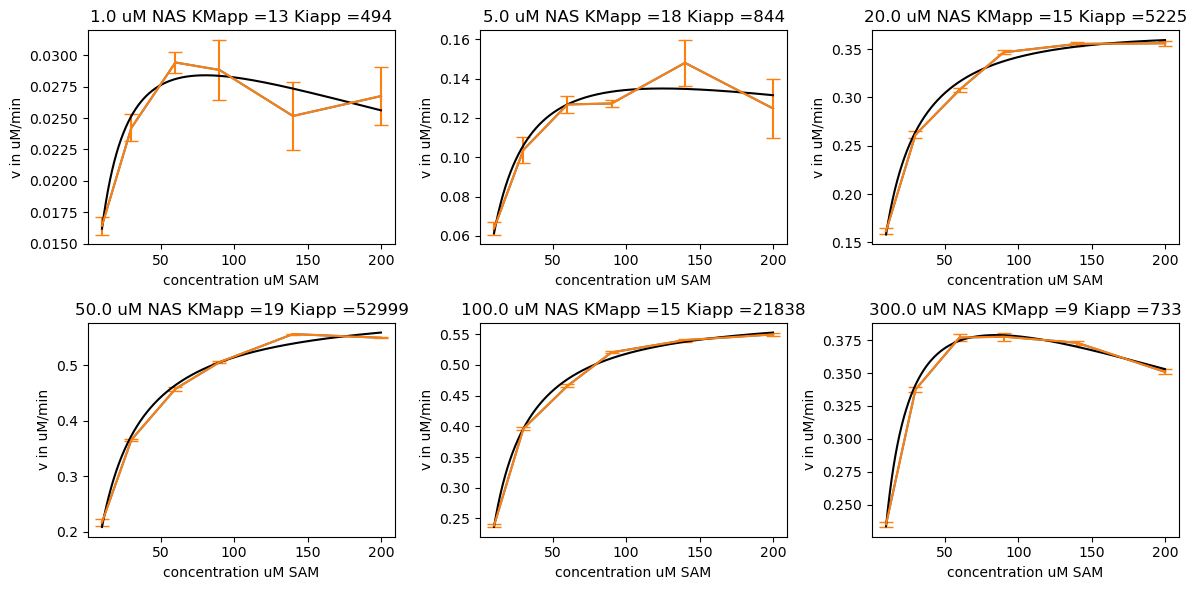

In [42]:
# Plot for fixed NAS conc and fit MM equation with substrate inhibition - subplot edition

import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

#more x values for curve plotting
x_SAM_fit = np.arange(10,200,.1)


# Define the number of rows and columns for subplots (assuming equal columns)
# Use transposed matrix for fixed NAS
n_rows = int(np.ceil(len(V.T.columns) / 3))  # adjust 3 for desired columns per row
n_cols = 3  # adjust for desired columns per row

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))  # adjust figsize as needed

# Loop through each column and plot in a subplot
for i, col in enumerate(V.T.columns):

    row = i // n_cols
    colo = i % n_cols  # calculate subplot indexes

    # Get the data for the current column
    data = V.T[col]
    col_array = data.to_numpy()

    # Choose your preferred plot type (example: histogram)
    axes[row, colo].plot(data)
    axes[row, colo].errorbar(x = data.index, y = data.values, yerr = V_esds.T[col], capsize = 5, ecolor = None)
    optimizedParameters, pcov = curve_fit(michaelis_menten_substrate_inhibition, x_SAM, col_array)
    print(col, ' uM NAS Vmax, KMapp : ', optimizedParameters)
    axes[row, colo].plot(x_SAM_fit, michaelis_menten_substrate_inhibition(x_SAM_fit, *optimizedParameters), label=optimizedParameters, color = '0')



    # Customize each subplot (labels, title, etc.)
    axes[row, colo].set_title(str(col) +  ' uM NAS ' + 'KMapp =' + str(int(optimizedParameters[1]))+ ' Kiapp =' + str(int(optimizedParameters[2])))
    axes[row, colo].set_xlabel('concentration uM SAM' )
    axes[row, colo].set_ylabel("v in uM/min")

# Adjust spacing and layout if needed
plt.tight_layout()

# Show the plot
plt.show()

10.0  uM SAM Vmax, KMapp :  [ 0.25911702 12.46239465]
30.0  uM SAM Vmax, KMapp :  [ 0.40216567 10.71013081]
60.0  uM SAM Vmax, KMapp :  [0.4681531  9.75397273]
90.0  uM SAM Vmax, KMapp :  [0.50279018 9.27170029]
140.0  uM SAM Vmax, KMapp :  [0.51875513 8.49219665]
200.0  uM SAM Vmax, KMapp :  [0.51345869 8.86301398]


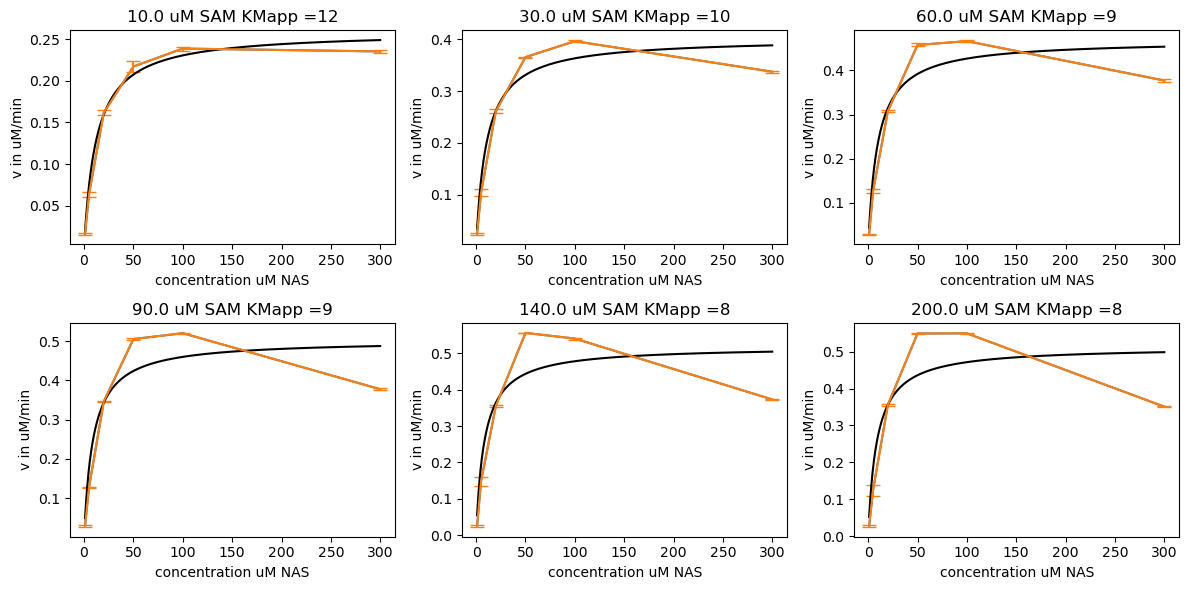

In [45]:
# Plot for fixed SAM conc and fit MM equation - subplot edition

import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

#more x values for curve plotting
y_NAS_fit = np.arange(1,300,.1)


# Define the number of rows and columns for subplots (assuming equal columns)
# Use transposed matrix for fixed NAS
n_rows = int(np.ceil(len(V.columns) / 3))  # adjust 3 for desired columns per row
n_cols = 3  # adjust for desired columns per row

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))  # adjust figsize as needed

# Loop through each column and plot in a subplot
for i, col in enumerate(V.columns):

    row = i // n_cols
    colo = i % n_cols  # calculate subplot indexes

    # Get the data for the current column
    data = V[col]
    col_array = data.to_numpy()

    # Choose your preferred plot type (example: histogram)
    axes[row, colo].plot(data)
    axes[row, colo].errorbar(x = data.index, y = data.values, yerr = V_esds[col], capsize = 5, ecolor = None)
    optimizedParameters, pcov = curve_fit(michaelis_menten, y_NAS, col_array)
    print(col, ' uM SAM Vmax, KMapp : ', optimizedParameters)
    axes[row, colo].plot(y_NAS_fit, michaelis_menten(y_NAS_fit, *optimizedParameters), label=optimizedParameters, color = '0')



    # Customize each subplot (labels, title, etc.)
    axes[row, colo].set_title(str(col) +  ' uM SAM ' + 'KMapp =' + str(int(optimizedParameters[1])))
    axes[row, colo].set_xlabel('concentration uM NAS' )
    axes[row, colo].set_ylabel("v in uM/min")

# Adjust spacing and layout if needed
plt.tight_layout()

# Show the plot
plt.show()

10.0  uM SAM Vmax, KMapp :  [2.99533630e-01 1.73448148e+01 1.37257395e+03]
30.0  uM SAM Vmax, KMapp :  [  0.56368968  22.24369867 502.627326  ]
60.0  uM SAM Vmax, KMapp :  [  0.72837568  24.76605893 348.53695843]
90.0  uM SAM Vmax, KMapp :  [  0.92687525  31.29979558 220.63863951]
140.0  uM SAM Vmax, KMapp :  [  1.08389358  35.71099509 165.27559611]
200.0  uM SAM Vmax, KMapp :  [  1.29693683  48.30499771 117.26684008]


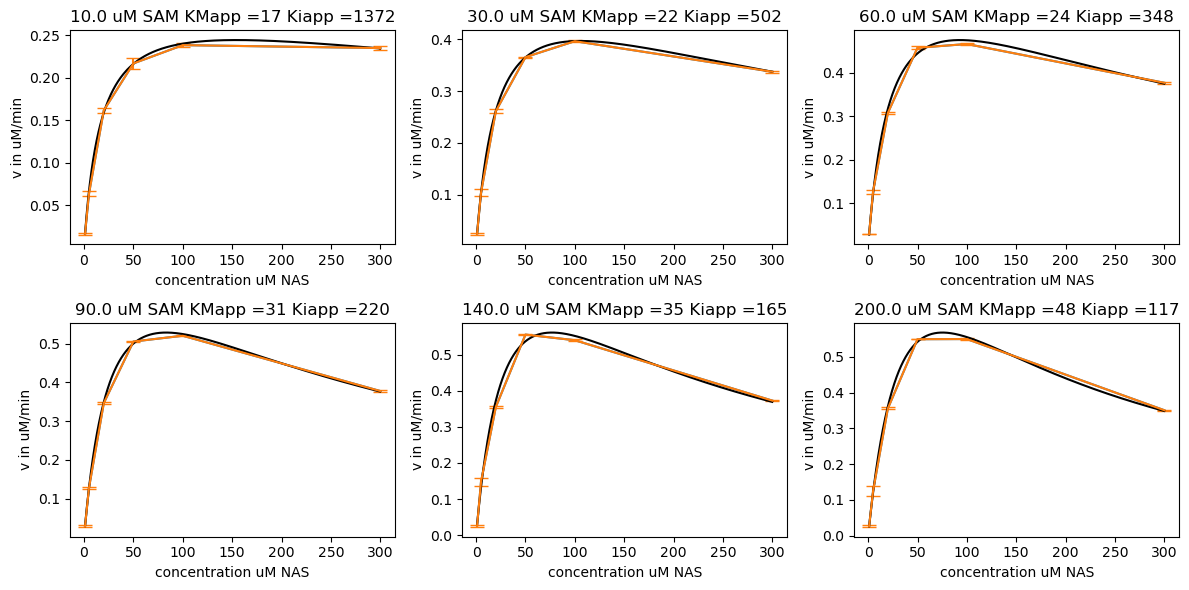

In [47]:
# Plot for fixed SAM conc and fit MM equation - subplot edition

import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

#more x values for curve plotting
y_NAS_fit = np.arange(1,300,.1)


# Define the number of rows and columns for subplots (assuming equal columns)
# Use transposed matrix for fixed NAS
n_rows = int(np.ceil(len(V.columns) / 3))  # adjust 3 for desired columns per row
n_cols = 3  # adjust for desired columns per row

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))  # adjust figsize as needed

# Loop through each column and plot in a subplot
for i, col in enumerate(V.columns):

    row = i // n_cols
    colo = i % n_cols  # calculate subplot indexes

    # Get the data for the current column
    data = V[col]
    col_array = data.to_numpy()

    # Choose your preferred plot type (example: histogram)
    axes[row, colo].plot(data)
    axes[row, colo].errorbar(x = data.index, y = data.values, yerr = V_esds[col], capsize = 5, ecolor = None)
    optimizedParameters, pcov = curve_fit(michaelis_menten_substrate_inhibition, y_NAS, col_array)
    print(col, ' uM SAM Vmax, KMapp : ', optimizedParameters)
    axes[row, colo].plot(y_NAS_fit, michaelis_menten_substrate_inhibition(y_NAS_fit, *optimizedParameters), label=optimizedParameters, color = '0')



    # Customize each subplot (labels, title, etc.)
    axes[row, colo].set_title(str(col) +  ' uM SAM ' + 'KMapp =' + str(int(optimizedParameters[1]))+ ' Kiapp =' + str(int(optimizedParameters[2])))
    axes[row, colo].set_xlabel('concentration uM NAS' )
    axes[row, colo].set_ylabel("v in uM/min")

# Adjust spacing and layout if needed
plt.tight_layout()

# Show the plot
plt.show()

Conclusion by analysis with one fixed substrate concentration:

In this concentration range ASMT undergo substrate inhibition. Most pronounced by NAS but also by SAM. Model for inhibition:

This is very different from the clearly ordered sequential reaction that is observed for Cathecol O-methyl transferase in the Lotta paper with SAM entering first and NAS last:

Lotta, T., Vidgren, J., Tilgmann, C., Ulmanen, I., Melén, K., Julkunen, I., & Taskinen, J. (1995). Kinetics of Human Soluble and Membrane-Bound Catechol O-Methyltransferase: A Revised Mechanism and Description of the Thermolabile Variant of the Enzyme. Biochemistry, 34(13), 4202–4210. https://doi.org/10.1021/bi00013a008

Then again ASMT is a dimer with a very occluded active site whereas COMT is moonomeric with a relatively open active site.


Now for 2D analysis

Bisubstrate reactions can sequential or ping-pong. Ping-pong would involve that SAM delivered a methyl group, left the enzyme ans then NAS would come and react with the protein bound methyl group. From the crystal structure with the ternary complex 4a6e I think we can rule that out. Sequential reactions can be either ordered as show in fig. 1

For the random mechanism (fig. 3) :

It is importent to realize that rate curves from both models will be hyperbolic in both dimensions. If maxima occur it can be explained by substrate inhibition (fig. 4):

surface representation

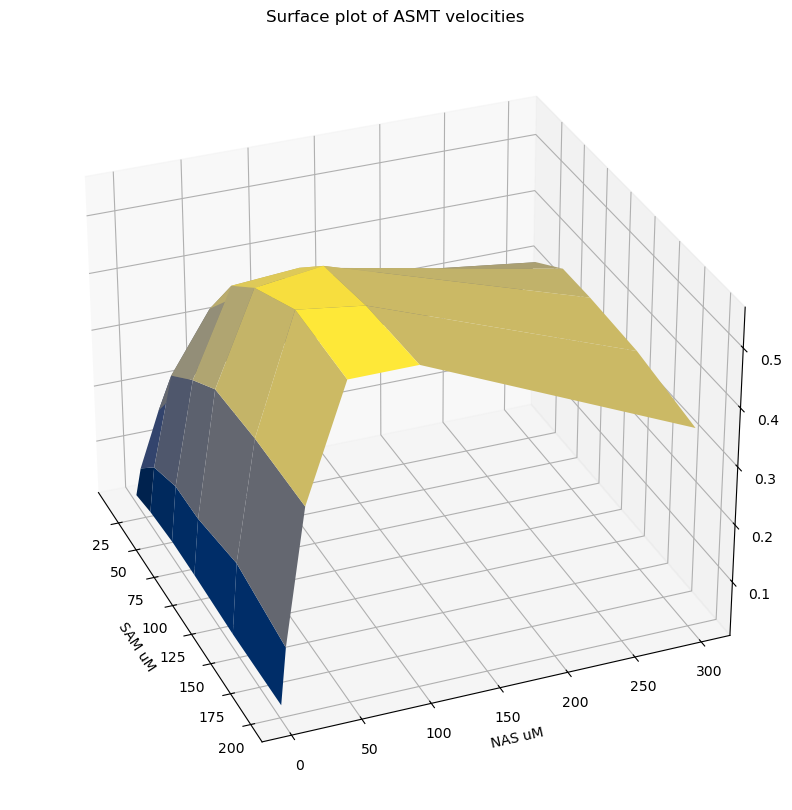

In [49]:
# Surface plot of velocities Shengxiao data

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)

# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')


# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.view_init(elev=30, azim=-22, roll=0)
ax.set_xlabel('SAM uM')
ax.set_ylabel('NAS uM')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT velocities')
plt.show()

In [55]:
#MM 2 substrate sequential ordered rate function
def BiBi(X,  Vmax, Ks_A, K_AB):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]

  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + C_A * C_B

  Vi = nom/den
  return Vi.flatten()

In [53]:
#MM 2 substrate inhibition model A sequential ordered rate function from :

'''
Vallejos-Baccelliere, G., Kaufman, S. B., González-Lebrero, R. M., Castro-Fernandez, V., & Guixé, V. (2022).
Characterisation of kinetics, substrate inhibition and product activation by
AMP of bifunctional ADP-dependent glucokinase/phosphofructokinase from Methanococcus maripaludis.
FEBS Journal, 289(23), 7519–7536. https://doi.org/10.1111/febs.16557
'''

def BiBi_substrate_B_inhibition(X,  Vmax, Ks_A, K_AB, Ki_B):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]


  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + C_A * C_B + C_B * C_B/Ki_B

  Vi = nom/den
  return Vi.flatten()

In [54]:
#MM 2 substrate inhibition model C sequential ordered rate function two dead-end complexes

'''
Vallejos-Baccelliere, G., Kaufman, S. B., González-Lebrero, R. M., Castro-Fernandez, V., & Guixé, V. (2022).
Characterisation of kinetics, substrate inhibition and product activation by
AMP of bifunctional ADP-dependent glucokinase/phosphofructokinase from Methanococcus maripaludis.
FEBS Journal, 289(23), 7519–7536. https://doi.org/10.1111/febs.16557
'''

def BiBi_substrate_AB_inhibition(X,  Vmax, Ks_A, K_AB, Ki_B, Ki_A):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]


  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + C_A * C_B + C_A * C_B * C_B/Ki_A + C_B * C_B/Ki_B

  Vi = nom/den
  return Vi.flatten()

In [56]:
#MM 2 substrate sequential random ordered rate function
def BiBi_random(X,  Vmax, Ks_A, Ks_B, K_AB, K_BA):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]

  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + K_BA * C_B + C_A * C_B

  Vi = nom/den
  return Vi.flatten()

In [57]:
#MM 2 substrate sequential random ordered rate function with substrate B inhibition via formation of an unproductive EB2 complex
def BiBi_random_B_inhibition(X,  Vmax, Ks_A, Ks_B, K_AB, K_BA, Ki_B2):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]

  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + K_BA * C_B + C_A * C_B + C_B * C_B / Ki_B2

  Vi = nom/den
  return Vi.flatten()

In [58]:
#MM 2 substrate sequential random ordered rate function with substrate B inhibition via formation of an unproductive EA2 and EB2 complexes
def BiBi_random_AB_inhibition(X,  Vmax, Ks_A, K_AB, K_BA, Ki_A2, Ki_B2):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]

  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + K_BA * C_B + C_A * C_B + C_B * C_B / Ki_B2 + C_A * C_A / Ki_A2

  Vi = nom/den
  return Vi.flatten()

In [59]:
#MM 2 substrate sequential random ordered rate function with substrate B inhibition via formation of an unproductive EA2 and EB2 complexes
# try for better convergence and one parameter less. Also this model implies that a second B molecule binds to EAB and forms unproductive EAB2 complex.
def BiBi_random_AB_inhibition_2(X,  A, K_AB, K_BA, Ki_EAB2, Ki_B2):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]
  Vmax = .4

  nom = C_A * C_B * Vmax
  den = A + K_AB * C_A + K_BA * C_B + C_A * C_B + C_B * C_B / Ki_B2 + C_B * C_B * C_A / Ki_EAB2

  Vi = nom/den
  return Vi.flatten()

In [60]:
#MM 2 substrate sequential random ordered rate function with substrate B inhibition via formation of an unproductive EA2 and EB2 complexes
# try for better convergence and one parameter less. Also this model implies that a second B molecule binds to EAB and forms unproductive EAB2 complex.
# fix K_AB and K_BA
def BiBi_random_AB_inhibition_3(X,  A, Ki_EAB2, Ki_B2):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]
  Vmax = .4
  K_AB = 10
  K_BA = 20

  nom = C_A * C_B * Vmax
  den = A + K_AB * C_A + K_BA * C_B + C_A * C_B + C_B * C_B / Ki_B2 + C_B * C_B * C_A / Ki_EAB2

  Vi = nom/den
  return Vi.flatten()

In [76]:
#MM 2 substrate sequential random ordered rate function with substrate B inhibition via formation of an unproductive EA2 and EB2 complexes
# try for better convergence and one parameter less. Also this model implies that a second B molecule binds to EAB and forms unproductive EAB2 complex.
# Exclude EB2 complex
def BiBi_random_AB_inhibition_4(X,  A, K_AB, K_BA, Ki_EAB2):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]
  Vmax = .4

  nom = C_A * C_B * Vmax
  den = A + K_AB * C_A + K_BA * C_B + C_A * C_B  + C_B * C_B * C_A / Ki_EAB2

  Vi = nom/den
  return Vi.flatten()

Now use scipy curve_fit to determine kinetic parameters

In [62]:
# Import curve_fit from scipy.optimize and determine substrate inhibition model parameters from the Shengxiao data 2
import os
from scipy.optimize import curve_fit

#print(xdata)

popt, pcov = curve_fit(BiBi_substrate_B_inhibition, xdata, zdata)
variance = [pcov[0][0], pcov[1][1], pcov[2][2], pcov[3][3]]
np.set_printoptions(precision=4)
print('Model parameters: ', popt)
print('ESD             : ', np.sqrt(variance))
print('Overfit estimate: ', np.linalg.cond(pcov))

Model parameters:  [ 0.6161 39.4468 10.389   8.8179]
ESD             :  [ 0.0403 21.7464  3.2298  2.3622]
Overfit estimate:  2005100.8127308036


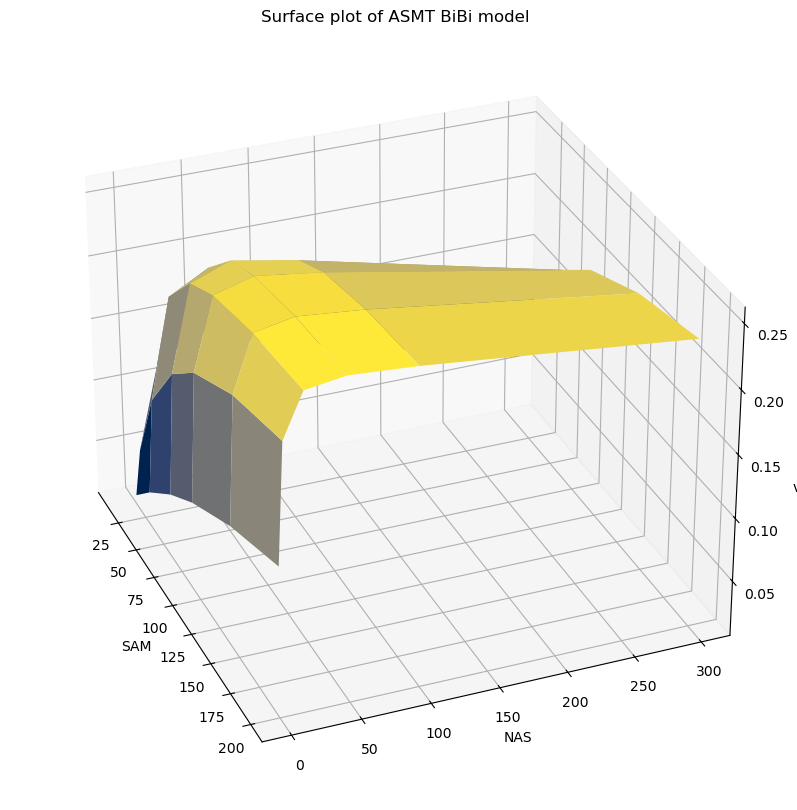

In [75]:
# Plot velocities from curve_fit determined parameters allejos-Baccelliere model A

# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

#X,Y = np.meshgrid(x_SAM, x_NAS)

Vmax = 0.27
Ks_A = 9124
K_AB = 0.025
Ki_B = 9.37


Z = np.reshape(BiBi_substrate_B_inhibition(xdata,  Vmax, Ks_A, K_AB , Ki_B), (6,6))


# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.view_init(elev=30, azim=-22, roll=0)
ax.set_xlabel('SAM')
ax.set_ylabel('NAS')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT BiBi model')
plt.show()

In [77]:
# Import curve_fit from scipy.optimize and determine substrate inhibition model parameters from the Shengxiao data 2
import os
from scipy.optimize import curve_fit

#print(xdata)

popt, pcov = curve_fit(BiBi_substrate_AB_inhibition, xdata, zdata, p0=[.27, 600.0, 10.0, 10, 100], maxfev = 30000)
variance = [pcov[0][0], pcov[1][1], pcov[2][2], pcov[3][3]]
np.set_printoptions(precision=4)
print('Model parameters: ', popt)
print('ESD             : ', np.sqrt(variance))
print('Overfit estimate: ', np.linalg.cond(pcov))

Model parameters:  [ 7.1841e-01 -6.9585e+07 -2.5729e-05  7.1947e+01  3.9047e+02]
ESD             :  [7.1516e-02 7.5079e+12 2.7939e+00 1.0090e+02]
Overfit estimate:  1.1096746857097203e+33


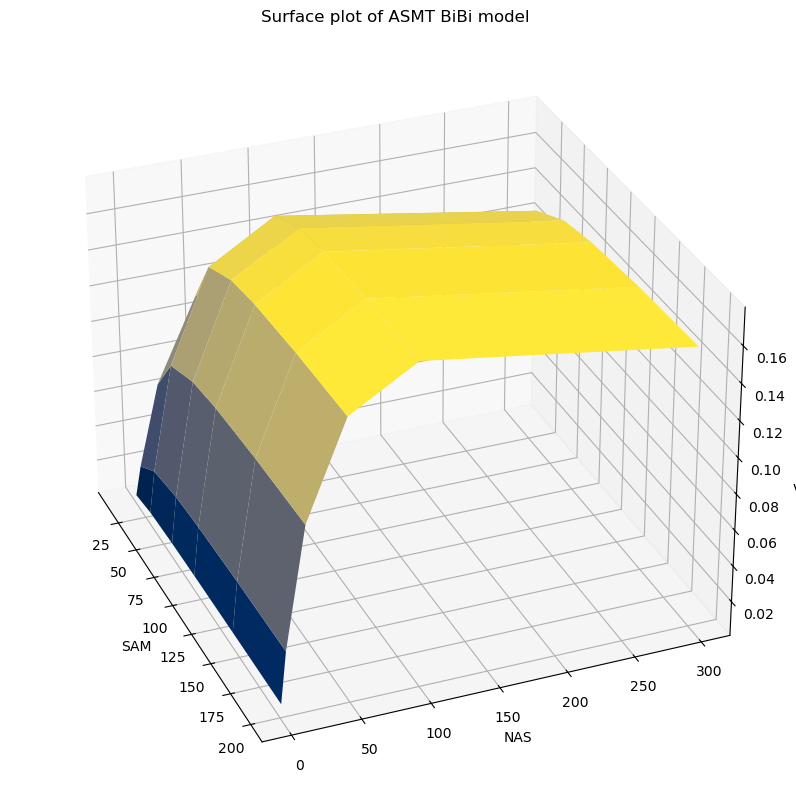

In [78]:
# Plot velocities from curve_fit determined parameters allejos-Baccelliere model A

# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

#X,Y = np.meshgrid(x_SAM, x_NAS)

Vmax = 0.27
Ks_A = 10
K_AB = 30
Ki_B = 40
Ki_A = 500



Z = np.reshape(BiBi_substrate_AB_inhibition(xdata,  Vmax, Ks_A, K_AB , Ki_B, Ki_A), (6,6))


# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.view_init(elev=30, azim=-22, roll=0)
ax.set_xlabel('SAM')
ax.set_ylabel('NAS')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT BiBi model')
plt.show()

Model parameters:  [2.7977e+02 2.4637e+00 8.8231e-01 1.0000e+05]
ESD             :  [1.9589e+02 2.3077e+00 3.0992e+00 3.9517e+06]
kcat:  0.7499999999999999 K_AB:  2.4637407713585304  K_BA:  0.8823052342525862  Ks_A:  113.55683936651705  Ks_B:  317.09504166197166  K_AB2:  99999.99999999999
Overfit estimate:  7290437961829.668


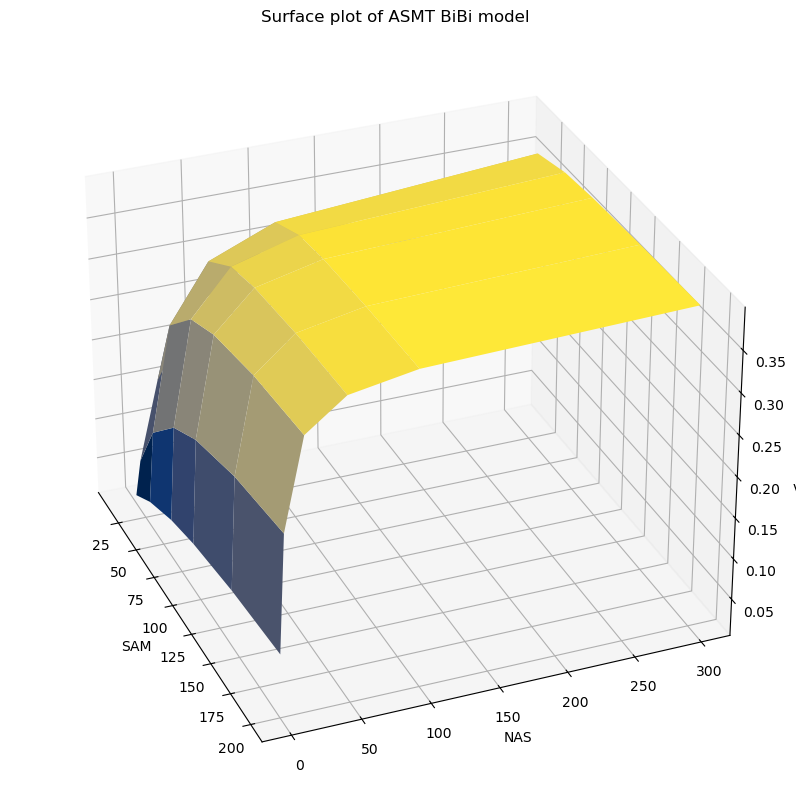

In [79]:
# Import curve_fit from scipy.optimize and determine random model parameters from the Shengxiao data 2
import os
from scipy.optimize import curve_fit

#print(xdata)

popt, pcov = curve_fit(BiBi_random_AB_inhibition_4, xdata, zdata, maxfev = 30000, bounds=(0, 100000))
variance = [pcov[0][0], pcov[1][1], pcov[2][2], pcov[3][3]]
#variance = [pcov[0][0], pcov[1][1], pcov[2][2]]
np.set_printoptions(precision=4)

Vmax = 0.3
E_t = 0.4 # uM
kcat = Vmax/E_t

print('Model parameters: ', popt)
print('ESD             : ', np.sqrt(variance))
K_AB =  popt[1]
K_BA =  popt[2]
Ks_A = popt[0]/K_AB
K_AB2 = popt[3]
Ks_B = K_AB/K_BA * Ks_A
print('kcat: ', kcat, 'K_AB: ', K_AB, ' K_BA: ', K_BA, ' Ks_A: ', Ks_A, ' Ks_B: ', Ks_B, ' K_AB2: ', K_AB2)
print('Overfit estimate: ', np.linalg.cond(pcov))

# Plot velocities from curve_fit determined parameters allejos-Baccelliere model A

# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

Z = np.reshape(BiBi_random_AB_inhibition_4(xdata,  *popt), (6,6))

# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.view_init(elev=30, azim=-22, roll=0)
ax.set_xlabel('SAM')
ax.set_ylabel('NAS')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT BiBi model')
plt.show()

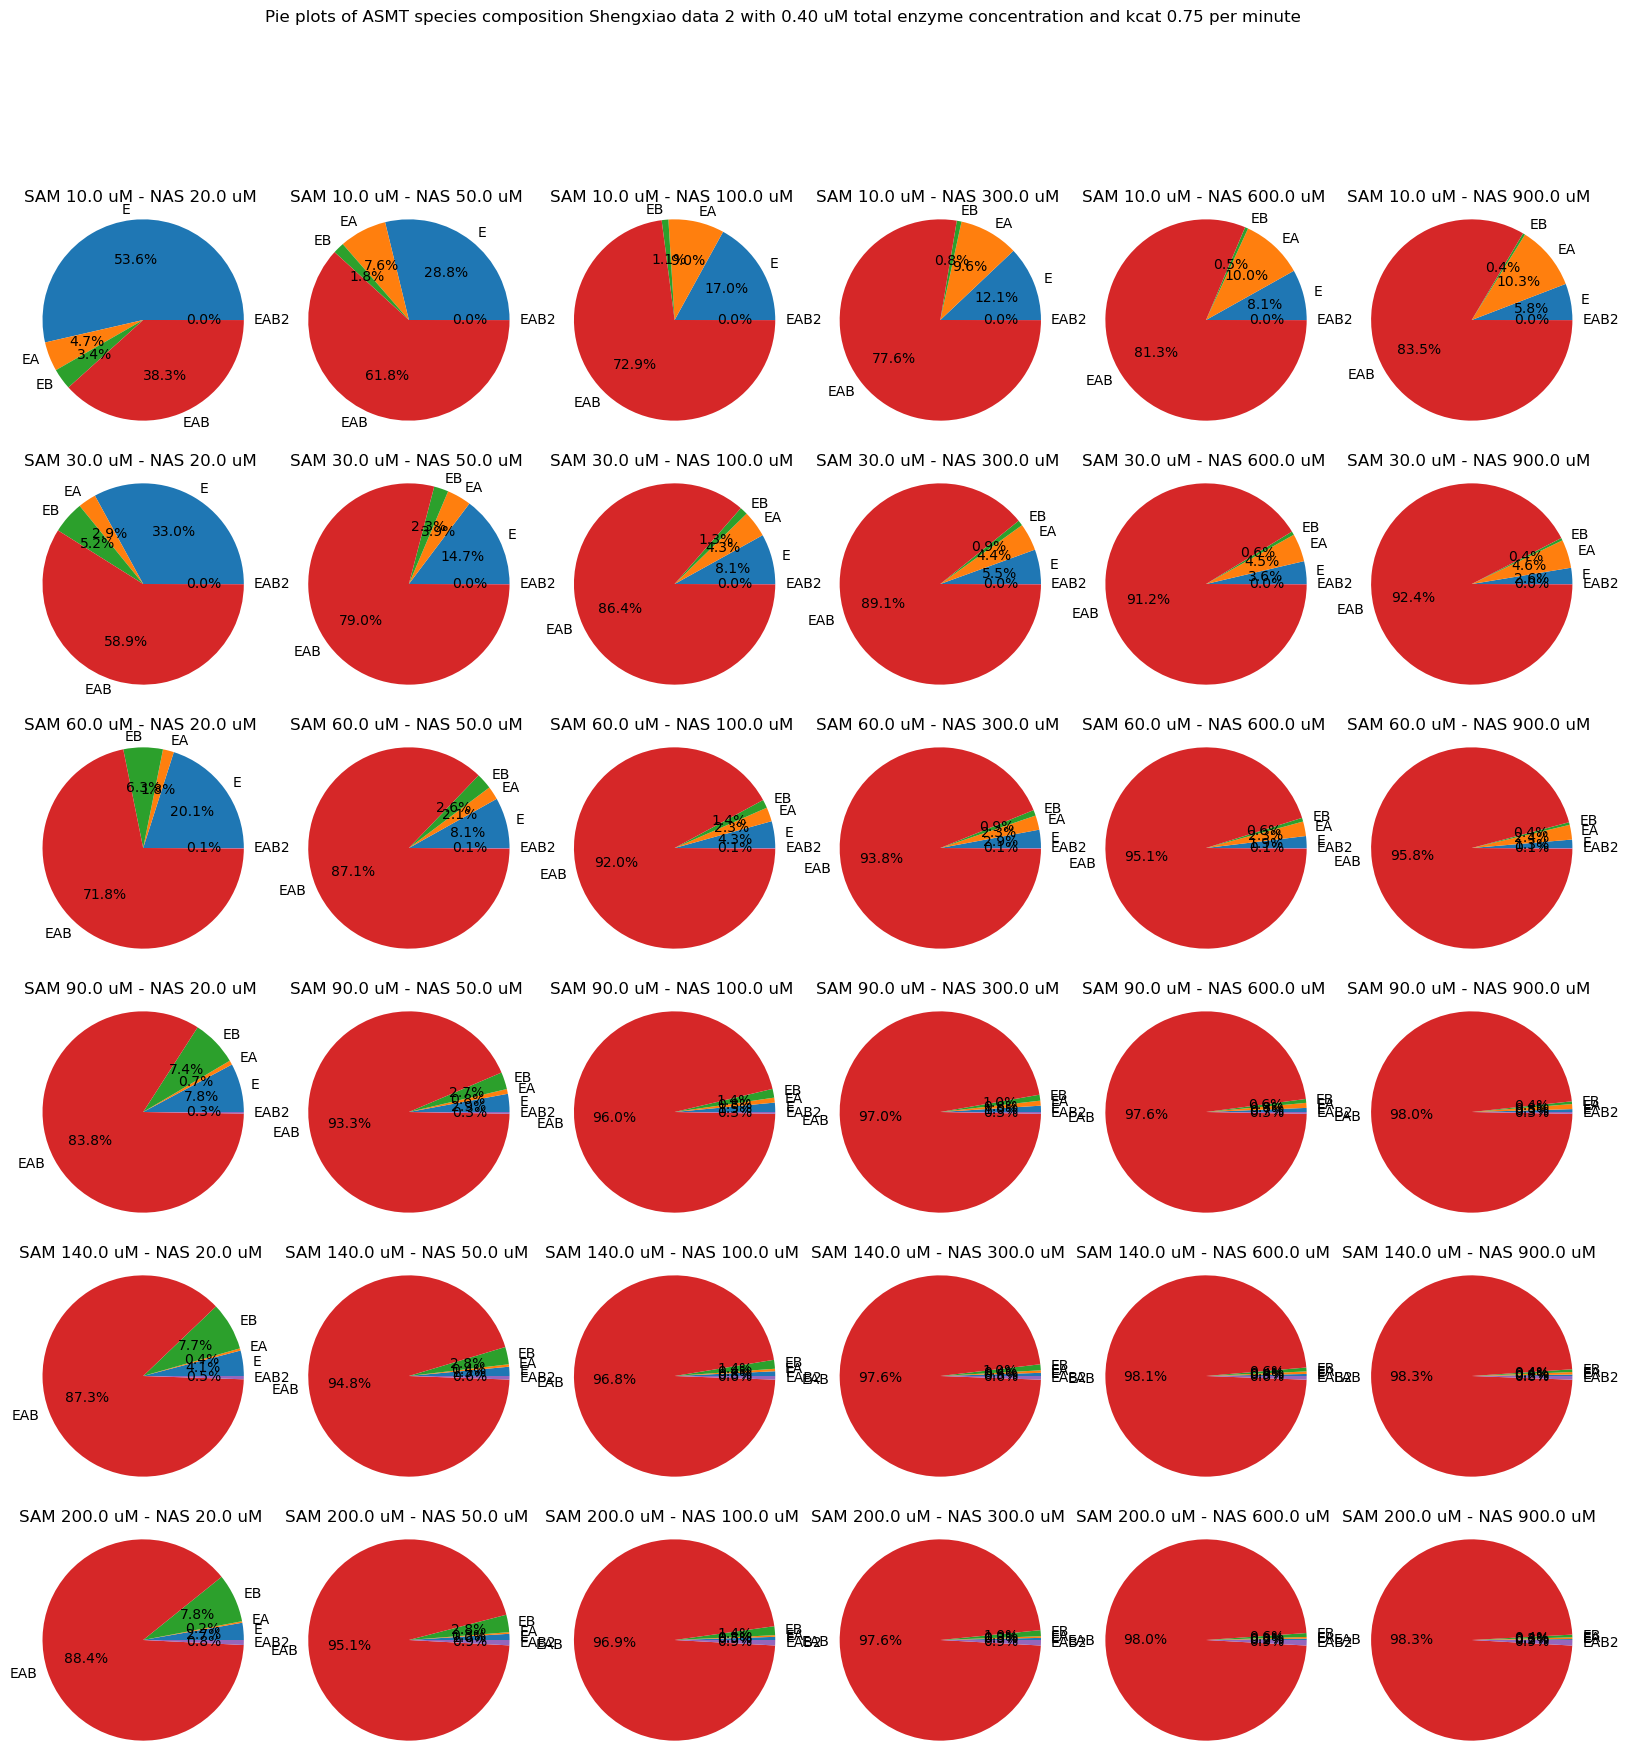

In [80]:
# Calculate species concentrations at initial rate equilibrium conditions

A = c_SAM
B = c_NAS[:, np.newaxis] # B now 2D

a1 = A/Ks_A
a2 = B/Ks_B
a3 = A*B/Ks_A/K_AB
a4 = A*B*B/K_AB/Ks_A/K_AB2
a5 = 1 + a1 + a2 + a3 + a4

E = E_t/a5
EA = a1 * E
EB = a2 * E
EAB = a3 * E
EAB2 = a4 * E

# Number of rows and columns for the subplot grid
rows = E.shape[0]
cols = 6

# Create a figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))  # Adjust figure size as needed
fig.suptitle('Pie plots of ASMT species composition Shengxiao data 2 with {:.2f} uM total enzyme concentration and kcat {:.2f} per minute'.format(E_t, kcat))

# Loop through each row and create a pie chart in a subplot
for row_index in range(rows):
  for col_index in range(cols):
    # Extract elements from the corresponding array
    elements = [E[row_index, col_index], EA[row_index, col_index], EB[row_index, col_index], EAB[row_index, col_index], EAB2[row_index, col_index]]

    # Create labels
    labels = ["E", "EA", "EB", "EAB", "EAB2"]

    # Create the pie chart in the current subplot
    axes[row_index, col_index].pie(elements, labels=labels, autopct="%1.1f%%")
    axes[row_index, col_index].set_title("SAM {} uM - NAS {} uM ".format(A.item(row_index), B.item(col_index)))

    # Remove ticks and labels for cleaner subplots
    axes[row_index, col_index].axis('equal')  # Equal aspect ratio for circle
    axes[row_index, col_index].set_xticks([])
    axes[row_index, col_index].set_yticks([])

# Adjust spacing and show the plot
#fig.tight_layout()
plt.show()